In [33]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
sns.set_style('darkgrid')
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
import pylab

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error #, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn import decomposition
from sklearn import linear_model
from sklearn.pipeline import Pipeline

import statsmodels.api as sm

from sklearn.neural_network import MLPRegressor

import tensorflow 
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import warnings
warnings.filterwarnings("ignore")

# from tensorflow.keras import utils
# from tensorflow.keras.utils import to_categorical

np.random.seed(42) # чтобы выборки данных всегда были одни и теже берем любую цифру . мне нравится 42

In [34]:
data_research = pd.read_csv(r'C:\Users\grain\Work_folder\Diplom_MGTU\Diploma3_corr\data_research.csv')

In [ ]:
data_research.describe()

In [ ]:
data_research.info()

In [35]:
# Функция оптимизации типов в dataframe.
# !!!! Код взят из источника https://github.com/ellavs/python-pandas-optimize-dataframe-memory-usage

def optimize_memory_usage(df, print_size=True):

# Types for optimization.
    # Типы, которые будем проверять на оптимизацию.
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    # Memory usage size before optimize (Mb).
    # (RU) Размер занимаемой памяти до оптимизации (в Мб).
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Memory usage size after optimize (Mb).
    # (RU) Размер занимаемой памяти после оптимизации (в Мб).
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Memory usage size: before {:5.4f} Mb - after {:5.4f} Mb ({:.1f}%).'.format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df

def import_data_from_csv(df):
    # Show dataframe info before optimize.
    # (RU) Показать информацию о таблице до оптимизации.
    print('-' * 80)
    print(df.info())
    print('-' * 80)
    # (RU) Оптимизация типов в dataframe.
    df = optimize_memory_usage(df) # используем функцию optimize_memory_usage , созданую выше
    # Show dataframe info after optimize.
    # (RU) Показать информацию о таблице после оптимизации.
    print('-' * 80)
    print(df.info())
    print('-' * 80)
    return df

In [36]:
# Вызываем функцию import_data_from_csv для уменьшения размерности переменных в файле df_bp_new

data_research = import_data_from_csv(data_research)

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   density           948 non-null    float64
 1   number_hardeners  948 non-null    float64
 2   surface_density   948 non-null    float64
 3   alfa              948 non-null    float64
dtypes: float64(4)
memory usage: 29.8 KB
None
--------------------------------------------------------------------------------
Memory usage size: before 0.0291 Mb - after 0.0146 Mb (49.8%).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   density           948 non-null    float32
 1   number_harde

In [ ]:
#  Этап 4 Нормализуем  наш dataset - data_research, чтобы привести наши данные к близким размерностям

In [ ]:
# Этап 4.1 Нормализация по методу MinMaxskaler

In [37]:
# список наших столбцов
list_data = list(data_research)

In [38]:
minmax_scaler = MinMaxScaler() # вызываем метод MinMaxskaler

In [39]:
#  обучаем MinMaxScaler() -передаем только числовые значения столбцов, указанных списком list_data или можно перечислить какие нужны
data_research_norm = minmax_scaler.fit_transform(np.array(data_research[list_data])) 
                                                           

In [40]:
data_research_norm[:1] # Проверим первую строку

array([[0.65250635, 0.07914975, 0.14827019, 0.76760995]], dtype=float32)

In [41]:
# создадим новый df с нормализованными данными с названием наших столбцов 
data_research_norm = pd.DataFrame(data = data_research_norm, columns = list_data)
data_research_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   density           948 non-null    float32
 1   number_hardeners  948 non-null    float32
 2   surface_density   948 non-null    float32
 3   alfa              948 non-null    float32
dtypes: float32(4)
memory usage: 14.9 KB


In [ ]:
data_research_norm.describe()

In [ ]:
data_research_norm.head()

In [ ]:
# Собираем датасет

In [42]:
y = data_research_norm['alfa']

In [43]:
X = data_research_norm.drop(['alfa'], axis=1)

In [ ]:
X.shape

In [ ]:
# Разделяем датасет на тестовые, проверочные и обучающие выборки за 2 приема

In [ ]:
# Разделяем датасет на тестовы (test) и 1-ю обучающие выборки
# Разбиваем X на X_train_full и X_test_full в пропорции 80/20, а y  на  y_train_full и y_test_full

In [44]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=45
                                                    )

In [ ]:
# X_test_full и y_test_full будут использованы в конце при проверке нашей моддели
## НУЖНО из записать в папку!!!

In [ ]:
X_test_full.shape

In [ ]:
y_test_full.shape

In [ ]:
X_train_full.shape

In [ ]:
y_train_full.shape

In [ ]:
# Разделяем датасет на проверочную (validation) и 2-ю обучающую выборки

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                    train_size=0.8, 
                                                    random_state=45
                                                    )

In [ ]:
# X_val и y_val будут использованы при проверке работоспособности нашей модели после обучения 

In [ ]:
X_train.shape

In [ ]:
X_val.shape

In [ ]:
y_train.shape

In [ ]:
y_val.shape

In [ ]:
# Линейная регрессия

In [ ]:
# 1. Математическая линейная регрессия
# Гипотеза: между X и y должна быть линейная зависимость

In [ ]:
# Опциональные параметры класса LinearRegression:
# fit_intercept – логический (True по умолчанию) параметр, который решает, вычислять отрезок b₀ (True) или рассматривать его как равный нулю (False).
# normalize – логический (False по умолчанию) параметр, который решает, нормализовать входные переменные (True) или нет (False).
# copy_X – логический (True по умолчанию) параметр, который решает, копировать (True) или перезаписывать входные переменные (False).
# n_jobs – целое или None (по умолчанию), представляющее количество процессов, задействованных в параллельных вычислениях. 
# None означает отсутствие процессов, при -1 используются все доступные процессоры.

In [46]:
model_LR = LinearRegression(n_jobs = -1)

In [47]:
model_LR.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [48]:
# Получаем парметры LinearRegression
model_LR.get_params().keys() 

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

# !!!!! Когда fit_intercept=True линия наилучшего соответствия может «соответствовать» оси Y. При fit_intercept=False пере

In [49]:
# Получаем текущие парметры нашей модели LinearRegression
model_LR.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
# Расчетные параметры рассчитаные LinearRegression для  нашего массива (X_train, y_train)

In [50]:
# Коеэффициенты для парметров
print('Коеэффициенты для параметров :', model_LR.coef_)

Коеэффициенты для параметров : [-0.06732082  0.01082223 -0.06388463]


In [51]:
# Представляем коэффициенты в виде DF
pd.DataFrame(model_LR.coef_, X_train.columns)

,0
density,-0.067321
number_hardeners,0.010822
surface_density,-0.063885


In [52]:
# Константа для линейного графика для наших параметров (сдвиг по оси Х)
print('Константа:', model_LR.intercept_)

Константа: 0.53328943


In [53]:
# Расчитаем коэффициент детерминации R2
r_sq = model_LR.score(X_train, y_train) # .round(3)!!!!! Округление до 3 знаков после запятой
print('коэффициент детерминации R2 =', r_sq)

коэффициент детерминации R2 = 0.010340765035596666


In [54]:
# Далее мы проводим перекрестную проверку, которая разделяет наши обучающие данные на количество выборок CV
# и подгоняет модель к разным выборкам и
# дает оценки для каждой выборки CV, чтобы получить наиболее подходящую модель, 
# прежде чем мы протестируем ее на данных тестирования (X_val и y_val), количество значений равно CV 
# cv - это количество разбиений нашего массива данных. Рекомендовано от 3 до 5

cv = 5
scores = cross_val_score(model_LR, X_train, y_train, cv = cv)
                         
print ('scores/Значение оценки при CV = ', cv, ':', scores)
print()
print('Mean Cross Validation Score: ', np.mean(scores))
print()
print('Стандартное отколение оценки:', np.std(scores))


scores/Значение оценки при CV =  5 : [-0.01277288 -0.00536927  0.01188085 -0.05035614 -0.00025261]

Mean Cross Validation Score:  -0.01137401173229422

Стандартное отколение оценки: 0.021081245260560592


In [ ]:
# Оценка регрессионной модели

In [ ]:
# Оценку модели проведем по X_val и  y_val

In [55]:
y_pred = model_LR.predict(X_val)

In [56]:
# https://your-scorpion.ru/linear-regression-python/

r2_score(y_val, y_pred)

-0.019389360805280864

In [ ]:
# аналогично r_sq_val = model_LR.score(X_val, y_val) такой же результат ПОЧЕМУ???

In [57]:
# Расчитаем МАЕ и MSE
MAE = metrics.mean_absolute_error(y_val, y_pred)
MSE = metrics.mean_squared_error(y_val, y_pred)

In [58]:
MAE

0.14888589

In [59]:
MSE

0.03459401

In [60]:
MAE / y_train.mean()

0.30886024

In [61]:
r_sq_val = model_LR.score(X_val, y_val)
print('коэффициент детерминации R2 =', r_sq_val)

коэффициент детерминации R2 = -0.019389360805280864


# собираем все метрики для оценки эффективности моделей
# https://github.com/KonstantKul/VKR_MGTU/blob/main/%D0%92%D0%9A%D0%A0_%D0%9C%D0%93%D0%A2%D0%A3_%D0%9A%D1%83%D0%BB%D0%B0%D0%B1%D1%83%D1%85%D0%BE%D0%B2%D0%9A%D0%92.ipynb
metrics_models_uprugost = pd.DataFrame()
metrics_models_uprugost = pd.concat([metrics_models_uprugost, lr_uprugost_result, kn_uprugost_result, rf_uprugost_result])
metrics_models_uprugost
     
Model	MAPE	R2
1	LR_uprugost	0.453354	-0.005
2	KN_uprugost	0.449671	-0.003
3	RF_uprugost	0.445775	-0.005
Cредняя абсолютная процентная ошибка между значениями, предсказанными моделью, 
и фактическими значениями составляет 45%. А коэфициент детерминации ~0 , что говорит о том, что данные прогнозируемые моделями равны усреднённым значениям. Такие низкие показатели работы моделей обусловлены слабой корреляцией данных.

In [62]:
# Расчиттаем 'accuracy' через модуль 'cross_val_predict'
predictions = cross_val_predict(model_LR, X_val, y_val, cv = cv)
accuracy = metrics.r2_score(y_val, predictions) 
print('Точность/accuracy: ', accuracy)
print()
print ('scores/Значение оценки при CV = ', cv, ':', predictions)
print()
print('Mean Cross Validation Score: ', np.mean(predictions))
print()
print('Стандартное отколение оценки:', np.std(predictions))

Точность/accuracy:  -0.011144723636782983

scores/Значение оценки при CV =  5 : [0.46183515 0.51239705 0.4249016  0.44043076 0.5133541  0.41674215
 0.46710053 0.5003041  0.509106   0.44651514 0.53532004 0.47562137
 0.40802473 0.441614   0.46055192 0.4680502  0.4849072  0.42525214
 0.4895003  0.5347859  0.46632195 0.47162583 0.44828182 0.42190126
 0.47167894 0.4834315  0.4780506  0.48315775 0.47227374 0.4536994
 0.5120544  0.48226672 0.50748056 0.4884396  0.49631336 0.48424938
 0.47543254 0.47252628 0.49048084 0.46940407 0.44960922 0.47058466
 0.48020595 0.45851275 0.4782159  0.47144532 0.46841684 0.43103296
 0.4681164  0.46908474 0.48361215 0.4571284  0.46570578 0.48407632
 0.4798058  0.42384204 0.45419693 0.47365817 0.50053805 0.487068
 0.46202523 0.5228042  0.4738945  0.47843286 0.444894   0.43624914
 0.4288675  0.43226507 0.42992398 0.41718382 0.48775196 0.49339592
 0.46572357 0.41149187 0.4860819  0.4558831  0.41426194 0.4610787
 0.47557703 0.46092984 0.4280826  0.46639127 0.470359

 Построить график: Точность - accuracy при разных cv

-0.02450619410360333 при cv = 3
-0.011144723636782983 при cv = 5 # наилучший показатель
-0.033191268849138034 при cv = 10
-0.03276950667117662 при cv = 15
-0.03770913716177726 при cv = 20
-0.03405005198500288 при cv = 25

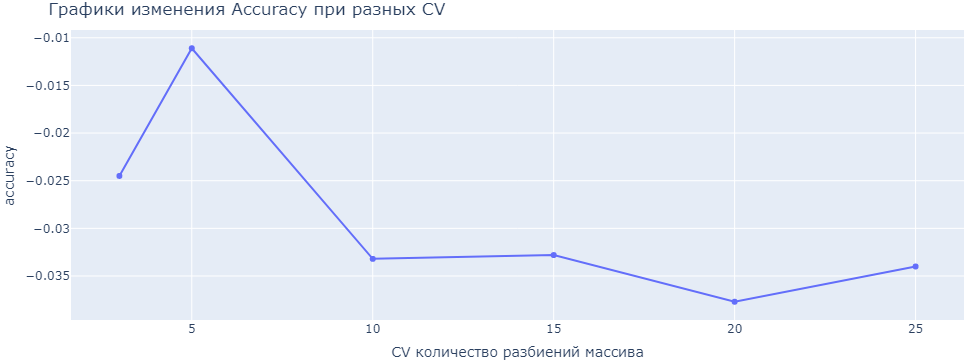

In [63]:
# Построить график: Точность - accuracy при разных cv
x = np.array([3, 5, 10, 15, 20, 25])
y = np.array([-0.0245, -0.0111, -0.0332,-0.0328,-0.0377, -0.034]) 
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))
fig.update_layout(title='Графики изменения Accuracy при разных CV',
                  xaxis_title='CV количество разбиений массива',
                  yaxis_title='accuracy',
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

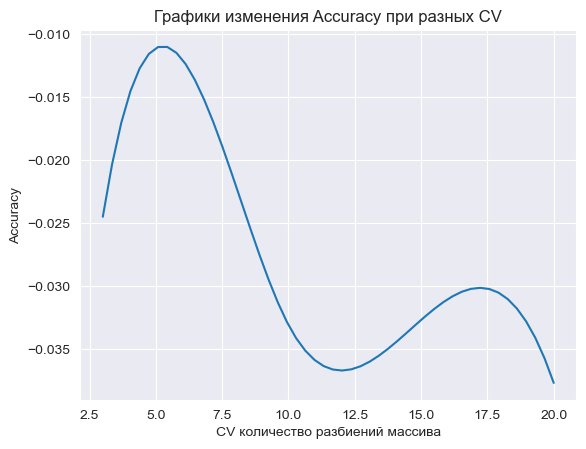

In [64]:
# Нарисуем плавный график
# Dataset
x = np.array([3, 5, 10, 15, 20])
y = np.array([-0.0245, -0.0111, -0.0331,-0.0327,-0.0377]) 

# Плавная кривая сплайна
X_Y_Spline = make_interp_spline(x, y) 

# Возвращает равномерно распределенные числа
# через указанный интервал - 50
X_ = np.linspace(x.min(), x.max(), 50)
Y_ = X_Y_Spline(X_)
'''
# Плавная кривая кубической интерполяции
cubic_interpolation_model = interp1d(x, y, kind = "cubic")
X_=np.linspace(x.min(), x.max(), 500)
Y_=cubic_interpolation_model(X_)
'''
# Рисуем график
plt.plot(X_, Y_)
plt.title('Графики изменения Accuracy при разных CV')
plt.xlabel('CV количество разбиений массива')
plt.ylabel('Аccuracy')
plt.show()


In [ ]:
# ________________________________________________________

In [ ]:
# 2. Линейная регрессия на основе статистических модулей

$y = w_0 + w_1x_1$

In [65]:
# Добавляем константу w0, так как в библиотеке sm она не предусмотрена
X_train_add = sm.add_constant(X_train)
X_train_add

,const,density,number_hardeners,surface_density
858,1.0,0.475380,0.376875,0.602928
392,1.0,0.783307,0.270056,0.300245
639,1.0,0.596950,0.477232,0.178399
211,1.0,0.281708,0.574292,0.411276
280,1.0,0.544767,0.417452,0.332976
...,...,...,...,...
270,1.0,0.304920,0.391090,0.221894
717,1.0,0.140245,0.819976,0.561119
277,1.0,0.525943,0.446944,0.624601
741,1.0,0.671605,0.230499,0.432913


In [67]:
# OLS - ordinary least squares - метод наименьших квадратов
model_sm = sm.OLS(y_train, X_train_add).fit()

In [68]:
model_sm.params

const               0.533289
density            -0.067321
number_hardeners    0.010822
surface_density    -0.063885
dtype: float64

In [69]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   alfa   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.097
Date:                Fri, 24 Mar 2023   Prob (F-statistic):             0.0995
Time:                        17:44:07   Log-Likelihood:                 133.38
No. Observations:                 606   AIC:                            -258.8
Df Residuals:                     602   BIC:                            -241.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5333      0.034     15.895      0.000       0.467       0.599
density             -0.0673      0.042     -1.609      0.108      -0.149       0.015
number_hardeners     0.0108      0.042      0.259      0.796      -0.071       0.093
surface_density     -0.0639      0.037     -1.723      0.085      -0.137       0.009
==============================================================================
Omnibus:                        4.153   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.455
Skew:                           0.089   Prob(JB):                        0.178
Kurtosis:                       2.676   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Стандартные ошибки предполагают, что ковариационная матрица ошибок задана правильно.

In [ ]:
plt.scatter(X_train['density'], y_train)
plt.plot(X_train, 0.533289 + (-0.067321 * X_train['density']), 'r')
plt.show()

# Оценка модели

In [71]:
X_val_add = sm.add_constant(X_val)
X_val_add

,const,density,number_hardeners,surface_density
781,1.0,0.323619,0.506409,0.048474
661,1.0,0.422767,0.291934,0.494410
26,1.0,0.502691,0.773287,0.365235
816,1.0,0.326226,0.664443,0.142430
193,1.0,0.339472,0.338994,0.598305
...,...,...,...,...
895,1.0,0.464181,0.315845,0.303789
819,1.0,0.301125,0.458225,0.396890
308,1.0,0.531090,0.125511,0.229072
548,1.0,0.207825,0.254263,0.300894


In [72]:
y_pred_const = model_sm.predict(X_val_add)

In [73]:
MAE = metrics.mean_absolute_error(y_val, y_pred_const) # mean_absolute_error
MSE = metrics.mean_squared_error(y_val, y_pred_const) # mean_squared_error

In [74]:
MAE

0.1488858873852724

In [ ]:
# 0.14888589 MAE в варианте регрессии по математической модели

In [75]:
MSE

0.03459400878217591

In [ ]:
# 0.03459401 MSE в варианте регрессиипо математической модели

In [ ]:
# Значения МАЕ и MSE получились одинаковыми!!

In [ ]:
#__________________________________________

# Оптимизации гиперпараметров -  Подбор параметров модели
# GridSearchCV и RandomizedSearchCV

GridSearch — поиск лучших параметров в фиксированной сетке возможных значений.
CV – перекрёстная проверка (кросс-валидация, Cross-validation), метод, который показывает, что модель не переобучилась


Подбор параметров – одна из важных задач для построения модели машинного обучения.
Изменение параметров модели может принципиально повлиять на ее качество. Например, модель может переобучиться. Перебор этих параметров вручную может занять колоссальное количество времени. 
Однако, существует модуль GridSearchCV.
GridSearchCV – это инструмент для автоматического подбирания параметров посетке имеющихся значений парметров для моделей машинного обучения. 
GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров.
GridSearchCV выполняет обучение и тестирование с использованием перекрестной проверки -(cross validation) вашего набора данных - отсюда и аббревиатура «CV» в GridSearchCV.

# Параметры GridSearchCV:

# estimator — модель которую хотим обучать (алгоритм);
# param_grid — передаем какие параметры хотим подбирать, GridSearchCV на всех параметрах попробует сделать обучение;
# CV — сколько разрезов кросс-валидации мы ходим сделать;  ( < 3 делать не стоит) 
# scoring — выбор метрики ошибки (для разных задач можно выбрать разные функции ошибки).

RandomizedSearchCV -Определим диапазон значений гиперпараметров для реализации случайного поиска.
Эта область параметров может иметь больший диапазон значений, чем та, которую мы построили для поиска по сетке, поскольку случайный поиск не пытается полностью опробовать все комбинации гиперпараметров.
RandomizedSearchCV случайным образом выбирает гиперпараметры, чтобы найти лучшие из них, и это означает, что в отличие от сеточного поиска, случайный поиск может быстро перебрать большое количество значений.

Взято с :
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://habr.com/ru/company/otus/blog/698370/
# https://newtechaudit.ru/gridsearchcv-pomoshhnik-v-vybore/    !!!
# https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/ !!!
# https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv

Используйте поиск по сетке, если у вас уже есть примерный диапазон известных значений гиперпараметров, которые будут работать хорошо. Убедитесь, что область значений параметров невелика, так как поиск по сетке может занять очень много времени. 

Применяйте случайный поиск в широком диапазоне значений, если у вас еще нет представления о параметрах, которые будут хорошо работать в вашей модели. Случайный поиск быстрее, чем поиск по сетке, и его всегда следует использовать, когда у вас большая область значений параметров.

Для получения наилучших результатов целесообразно использовать как случайный поиск, так и поиск по сетке.
При больших размерах области значений параметров можно сначала использовать случайный поиск, так как он быстрее. Затем, используя лучшие гиперпараметры, найденные при случайном поиске, сузить сетку параметров и ввести в сеточный поиск меньший диапазон значений.

In [ ]:
# Линейная регрессия

In [ ]:
# Оптимизации гиперпараметров -  Подбор параметров модели GridSearchCV
# Выбор парметров для LinearRegression:

In [76]:
# Линейная регрессия
model_LR1 = LinearRegression()
model_LR1\

.fit(X_train, y_train)

LinearRegression()

In [80]:
# Инициализация сеток параметров моделей, по которым будет выполняться поиск

LinReg_params = {'fit_intercept': [True, False],
                 'positive': [True, False]}

model_LR1 = GridSearchCV(estimator=model_LR1, scoring='neg_root_mean_squared_error',
                            param_grid=LinReg_params, cv= cv)

print('Лучший оценщик = ', model_LR1.best_estimator_)
print('Лучшая оценка LinReg = ', model_LR1.best_score_)
print('Лучшие парметры LinReg = ',  model_LR1.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

Взято из:
https://translated.turbopages.org/proxy_u/en-ru.ru.2f7ae732-64184cbb-8abf6390-74722d776562/https/www.projectpro.io/recipes/create-and-optimize-baseline-linear-regression-model

In [ ]:
std_scl = StandardScaler()
pca = decomposition.PCA()
linear = linear_model.LinearRegression()

In [ ]:
pipe = Pipeline(steps=[('std_scl', std_scl),
                       ('pca', pca),
                       ('linear', linear)])

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))

In [ ]:
normalize = [True, False]

In [ ]:
parameters = dict(pca__n_components = n_components,
                  linear__normalize = normalize)

In [ ]:
clf = GridSearchCV(pipe, parameters)
clf.fit(X_train, y_train)

In [ ]:
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); 
print(clf.best_estimator_.get_params()['linear'])

In [ ]:
# ПРОВЕРИТЬ!!!! 

In [79]:
# Оптимизируем выбор гиперпарметров по сетке значений для LinearRegression с помощью модуля  GridSearchCV:   
model_LR1 = GridSearchCV(estimator = model_LR1, 
                            scoring = 'neg_root_mean_squared_error',
                            param_grid = LinReg_params, 
                            cv=cv
                           )

In [ ]:
# ___________________________

In [ ]:
# https://scikit-learn.ru/1-4-support-vector-machines/!!!!!
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR
# Support Vector Machine Метод опорных векторов
# метод регрессией опорных векторов

For LinearSVC (и LogisticRegression) любой ввод, переданный как массив numpy, 
будет скопирован и преобразован в liblinear внутреннее разреженное представление данных
(числа с плавающей запятой двойной точности и индексы int32 ненулевых компонентов). 

cache_size более высокое значение, чем значение по умолчанию 200 (МБ), например 500 (МБ) или 1000 (МБ).

In [ ]:
SupVecR_model = SVR()
SupVecR_model.get_params().keys()

In [ ]:
# Текущие парметры модели SupVecR_model
print('Текущие парметры модели:', SupVecR_model.get_params())

In [ ]:
# Создадим сетку -  'словарь-атрибутов'  из нескольких, наиболее значимых атрибутов 
SVR_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': range(1, 5),
              'gamma': ['scale', 'auto']
             }

In [ ]:
# Осуществим подбор оптимальных параметров для нашей модели SupVecR_model методом GridSearchCV
model_SVR = GridSearchCV(estimator=SupVecR_model, 
                         scoring='neg_root_mean_squared_error', # как мы будем оценивать модель (используем scoring нашей модели)
                         param_grid=SVR_params, 
                         cv=5) # количество разбиений на кросс-валидацию ( < 3 делать не стоит) 

In [ ]:
y_svr = np.ravel(y_train) # Функция ravel() возвращает сжатый до одной оси массив.
model_SVR.fit(X_train, y_train)

print(model_SVR.best_estimator_)
print(model_SVR.best_score_)
print(model_SVR.best_params_)
model_SVR = SVR(kernel=model_SVR.best_params_['kernel'],
                gamma=model_SVR.best_params_['gamma'],
                degree=model_SVR.best_params_['degree'])


In [ ]:
model_SVR.fit(X_train, np.ravel(y_train))

In [ ]:
SVR(degree=2, gamma='auto', kernel='poly')
-0.19470368492581774
{'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
#__________________________________________